# Auswertung Characterisation der Hornantennen

## Load Packages

In [57]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from pathlib import Path
import glob
import re
from datetime import datetime

## Load Data

In [124]:
def load_data(date=None):
    dfs = []
    info = {
        "timestamps": [],
        "V0": [],
        "min_angle": [],
        "max_angle": [],
        "step_size": []
    }
    
    base_path = "/Users/Ben/Desktop/Masterarbeit/data" if date==None else f"/Users/Ben/Desktop/Masterarbeit/data/{date}"
    filelist = list(Path(base_path).rglob("*.csv"))
    filelist.sort()
    
    print(f"{len(filelist)} files found in {base_path}:")
    for file in filelist:
        if file.stat().st_size == 0:
            print(f"File {file} is empty.")
        data = pd.read_csv(file, sep=",")
        dfs.append(data)
        
        name = os.path.basename(file)  # nur Dateiname ohne Pfad
        name_only, _ = os.path.splitext(name)
        parts = name_only.split("_")
        date_only = parts[1]
        timestamp = datetime.strptime(date_only,"%Y-%m-%d-T%H-%M-%S")
        
        info["timestamps"].append(timestamp)
        info["min_angle"].append(parts[2])
        info["max_angle"].append(parts[3])
        info["step_size"].append(parts[5])
        info["V0"].append(parts[4])
    
    return_data = {
        "filelist": filelist,
        "dfs": dfs,
        "info": info
    }
    return return_data

def print_info(data_number, data):
    print(f"File: {data['filelist'][data_number]}")
    print(f"Timestamp: {data['info']['timestamps'][data_number]}")
    print(f"Min_angle: {data['info']['min_angle'][data_number]}")
    print(f"Max_angle: {data['info']['max_angle'][data_number]}")
    print(f"Step_size: {data['info']['step_size'][data_number]}")
    print(f"V0: {data['info']['V0'][data_number]}")

## Plot

In [128]:
def plot_data_db(df):
    """ Plotte einen Datensatz mit dem Index 'angle' und den Spalten 'mean' und 'std' als db Voltage Level."""
    required_cols = {"mean_db", "std_db"} # "angle"
    if not required_cols.issubset(df.columns):
        raise ValueError(f"CSV muss die Spalten {required_cols} enthalten")
    #df = df.sort_values(by="angle")
    
    plt.figure(figsize=(10, 6))
    plt.errorbar(df["angle"],df["mean_db"], yerr=df["std_db"], fmt="o-", capsize=4, label="Datapoints with errorbars")
    plt.title("Characterisation of the horn antennas")
    plt.xlabel("Angle (°)")
    plt.ylabel("Voltage Level (db)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    #plt.savefig("Plots/2025_12_19/2025_12_19_Characterisation_Alu_Lensholder.pdf", format="pdf", bbox_inches="tight")
    plt.show()
    
def plot_data_raw(df):
    """ Plotte einen Datensatz mit dem Index 'angle' und den Spalten 'mean' und 'std' als db Voltage Level."""
    required_cols = {"mean_raw", "std_raw"} # "angle"
    if not required_cols.issubset(df.columns):
        raise ValueError(f"CSV muss die Spalten {required_cols} enthalten")
    #df = df.sort_values(by="angle")
    
    plt.figure(figsize=(10, 6))
    plt.errorbar(df["angle"],df["mean_raw"], yerr=df["std_raw"], fmt="o-", capsize=4, label="Datapoints with errorbars")
    plt.title("Characterisation of the horn antennas")
    plt.xlabel("Angle (°)")
    plt.ylabel("Voltage (V)")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    #plt.savefig("Plots/2025_12_19/2025_12_19_Characterisation_Alu_Lensholder.pdf", format="pdf", bbox_inches="tight")
    plt.show()

## Output

5 files found in /Users/Ben/Desktop/Masterarbeit/data/2025-12-19:
File: /Users/Ben/Desktop/Masterarbeit/data/2025-12-19/data_2025-12-19-T09-22-08_-60_60_0.5_0.20004047407946116.csv
Timestamp: 2025-12-19 09:22:08
Min_angle: -60
Max_angle: 60
Step_size: 0.20004047407946116
V0: 0.5


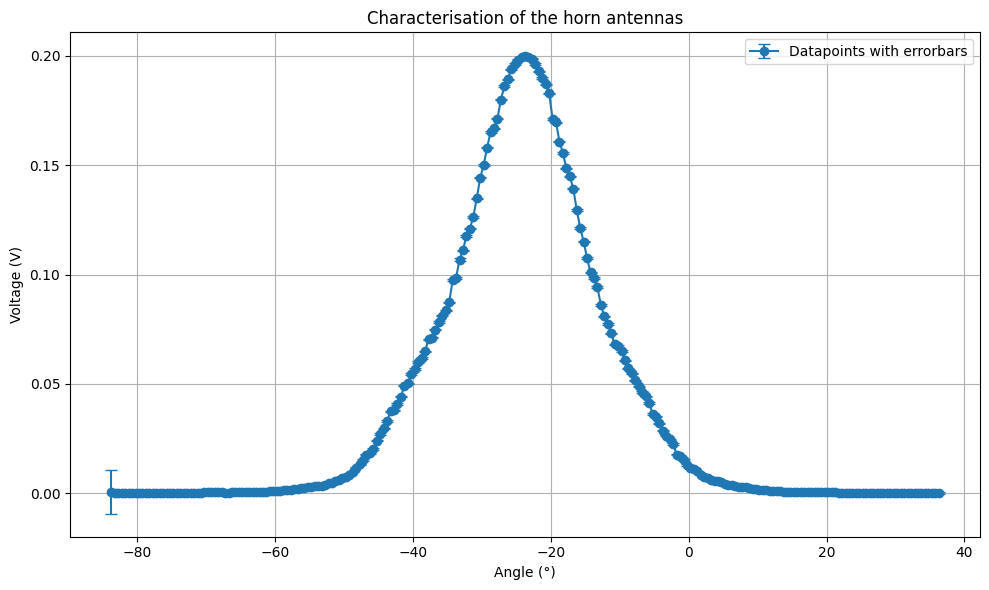

In [129]:
data_number = 0
data = load_data("2025-12-19")
print_info(data_number, data)
#print(data["dfs"][data_number])
plot_data_raw(data["dfs"][data_number])